In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
for i in[1,2,3,4] :
    print('Number is : ', i)

Number is :  1
Number is :  2
Number is :  3
Number is :  4


In [3]:
for i in range(0, 10) :
    print(i**2)


0
1
4
9
16
25
36
49
64
81


리스트 컴프리헨션(list comprehension)

In [4]:
[i**2 for i in range(0, 10) ]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

pandas pivot table

In [5]:
df = pd.read_excel('../../data_add/02. sales-funnel.xlsx')
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [6]:
df.pivot_table(index = 'Name')

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [7]:
# 멀티인덱스(muti - index)

df.pivot_table(index = ['Name', 'Rep', 'Manager'])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


In [8]:
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [9]:
df.pivot_table(index = ['Manager', 'Rep'], values = 'Price')

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

In [10]:
df.pivot_table(index = ['Manager', 'Rep'], values = 'Price', aggfunc = [np.sum, len])

sum   len
                              Price Price
Manager       Rep                        
Debra Henley  Craig Booker    80000     4
              Daniel Hilton  115000     3
              John Smith      40000     2
Fred Anderson Cedric Moss    110000     4
              Wendy Yule     177000     4

In [11]:
df.pivot_table(index = ['Manager', 'Rep'], columns = 'Product', values = 'Price', aggfunc = [np.sum])

sum                             
Product                           CPU Maintenance Monitor Software
Manager       Rep                                                 
Debra Henley  Craig Booker    65000.0      5000.0     NaN  10000.0
              Daniel Hilton  105000.0         NaN     NaN  10000.0
              John Smith      35000.0      5000.0     NaN      NaN
Fred Anderson Cedric Moss     95000.0      5000.0     NaN  10000.0
              Wendy Yule     165000.0      7000.0  5000.0      NaN

In [12]:
# NaN값 설정 : fill_value

df.pivot_table(index = ['Manager', 'Rep'], columns = 'Product', values = 'Price', aggfunc = [np.sum], fill_value = 0)

sum                             
Product                         CPU Maintenance Monitor Software
Manager       Rep                                               
Debra Henley  Craig Booker    65000        5000       0    10000
              Daniel Hilton  105000           0       0    10000
              John Smith      35000        5000       0        0
Fred Anderson Cedric Moss     95000        5000       0    10000
              Wendy Yule     165000        7000    5000        0

In [13]:
# 2개 이상의 index, values 설정

df.pivot_table(
    index = ['Manager', 'Rep', 'Product'],  
    values = ['Price', 'Quantity'],
    aggfunc = [np.sum], 
    fill_value = 0
)


sum         
                                          Price Quantity
Manager       Rep           Product                     
Debra Henley  Craig Booker  CPU           65000        2
                            Maintenance    5000        2
                            Software      10000        1
              Daniel Hilton CPU          105000        4
                            Software      10000        1
              John Smith    CPU           35000        1
                            Maintenance    5000        2
Fred Anderson Cedric Moss   CPU           95000        3
                            Maintenance    5000        1
                            Software      10000        1
              Wendy Yule    CPU          165000        7
                            Maintenance    7000        3
                            Monitor        5000        2

In [14]:
# 2개 이상의 index, values 설정
# aggfunc 2개 이상 
df.pivot_table(
    index = ['Manager', 'Rep', 'Product'],  
    values = ['Price', 'Quantity'],
    aggfunc = [np.sum, np.mean], 
    fill_value = 0
)


sum            mean         
                                          Price Quantity  Price Quantity
Manager       Rep           Product                                     
Debra Henley  Craig Booker  CPU           65000        2  32500      1.0
                            Maintenance    5000        2   5000      2.0
                            Software      10000        1  10000      1.0
              Daniel Hilton CPU          105000        4  52500      2.0
                            Software      10000        1  10000      1.0
              John Smith    CPU           35000        1  35000      1.0
                            Maintenance    5000        2   5000      2.0
Fred Anderson Cedric Moss   CPU           95000        3  47500      1.5
                            Maintenance    5000        1   5000      1.0
                            Software      10000        1  10000      1.0
              Wendy Yule    CPU          165000        7  82500      3.5
                            Maintenance    7000        3   7000      3.0
                            Monitor        5000        2   5000      2.0

In [15]:
# 2개 이상의 index, values 설정
# aggfunc 2개 이상 


df.pivot_table(
    index = ['Manager', 'Rep', 'Product'],  
    values = ['Price', 'Quantity'],
    aggfunc = [np.sum, np.mean], 
    fill_value = 0,
    margins = True # 총계(All) 추가
)


sum                   mean  \
                                          Price Quantity         Price   
Manager       Rep           Product                                      
Debra Henley  Craig Booker  CPU           65000        2  32500.000000   
                            Maintenance    5000        2   5000.000000   
                            Software      10000        1  10000.000000   
              Daniel Hilton CPU          105000        4  52500.000000   
                            Software      10000        1  10000.000000   
              John Smith    CPU           35000        1  35000.000000   
                            Maintenance    5000        2   5000.000000   
Fred Anderson Cedric Moss   CPU           95000        3  47500.000000   
                            Maintenance    5000        1   5000.000000   
                            Software      10000        1  10000.000000   
              Wendy Yule    CPU          165000        7  82500.000000   
                            Maintenance    7000        3   7000.000000   
                            Monitor        5000        2   5000.000000   
All                                      522000       30  30705.882353   

                                                   
                                         Quantity  
Manager       Rep           Product                
Debra Henley  Craig Booker  CPU          1.000000  
                            Maintenance  2.000000  
                            Software     1.000000  
              Daniel Hilton CPU          2.000000  
                            Software     1.000000  
              John Smith    CPU          1.000000  
                            Maintenance  2.000000  
Fred Anderson Cedric Moss   CPU          1.500000  
                            Maintenance  1.000000  
                            Software     1.000000  
              Wendy Yule    CPU          3.500000  
                            Maintenance  3.000000  
                            Monitor      2.000000  
All                                      1.764706

python 모듈 설치

In [16]:
pip list

Package                       Version
----------------------------- --------------------
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
async-generator               1.10
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bitarray                      2.5.1
bkc

In [17]:
get_ipython().system('pip list')

Package                       Version
----------------------------- --------------------
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
async-generator               1.10
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bitarray                      2.5.1
bkc

넘파이(Numpy)

In [18]:
np.array([0.3, 1.00, 1.00000, 0.9898, 0.8123123])

array([0.3      , 1.       , 1.       , 0.9898   , 0.8123123])

In [19]:
n_a = np.array([0.3, 1.00, 1.00000, 0.9898, 0.8123123])


In [20]:
np.mean(n_a)

0.82042246

In [21]:
n_b = np.array([[0.3, 1.00, 1.00000, 0.9898, 0.8123123],
               [0.2, 0.99, 0.12345, 0.1234, 0.1111111]])

In [22]:
# 전체 원소의 평균

np.mean(n_b)

0.56500734

In [23]:
# 세로방향(서로 다른 행끼리)
np.mean(n_b, axis = 0)

array([0.25     , 0.995    , 0.561725 , 0.5566   , 0.4617117])

In [24]:
# 가로방향(서로 다른 열끼리)
np.mean(n_b, axis = 1)

array([0.82042246, 0.30959222])

seaborn

In [25]:
import seaborn as sns

# 한글폰트 깨짐 방지

from matplotlib import font_manager, rc

font_path = '../visualization/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

# 마이너스 부호 깨짐 방지
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False




In [26]:
np.linspace(0, 14, 100)

array([ 0.        ,  0.14141414,  0.28282828,  0.42424242,  0.56565657,
        0.70707071,  0.84848485,  0.98989899,  1.13131313,  1.27272727,
        1.41414141,  1.55555556,  1.6969697 ,  1.83838384,  1.97979798,
        2.12121212,  2.26262626,  2.4040404 ,  2.54545455,  2.68686869,
        2.82828283,  2.96969697,  3.11111111,  3.25252525,  3.39393939,
        3.53535354,  3.67676768,  3.81818182,  3.95959596,  4.1010101 ,
        4.24242424,  4.38383838,  4.52525253,  4.66666667,  4.80808081,
        4.94949495,  5.09090909,  5.23232323,  5.37373737,  5.51515152,
        5.65656566,  5.7979798 ,  5.93939394,  6.08080808,  6.22222222,
        6.36363636,  6.50505051,  6.64646465,  6.78787879,  6.92929293,
        7.07070707,  7.21212121,  7.35353535,  7.49494949,  7.63636364,
        7.77777778,  7.91919192,  8.06060606,  8.2020202 ,  8.34343434,
        8.48484848,  8.62626263,  8.76767677,  8.90909091,  9.05050505,
        9.19191919,  9.33333333,  9.47474747,  9.61616162,  9.75

In [27]:
x = np.linspace(0, 14, 100)
y1 = np.sin(x)
y2 = 2*np.sin(x+0.5)
y3 = 3*np.sin(x+1.0)
y4 = 4*np.sin(x+1.5)

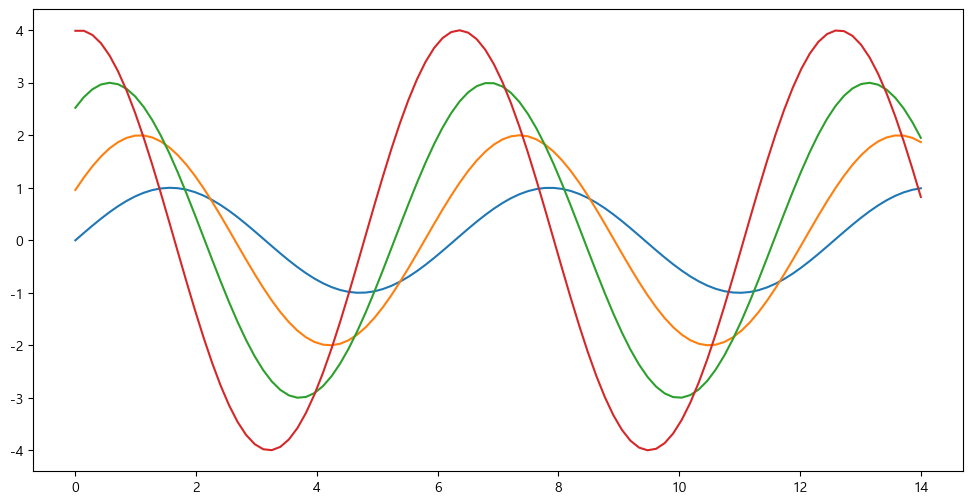

In [28]:
plt.figure(figsize = (12, 6))
plt.plot(x,y1, x,y2, x,y3, x,y4)

In [29]:
# seaborn tips data

sns.load_dataset('tips')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [30]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [31]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


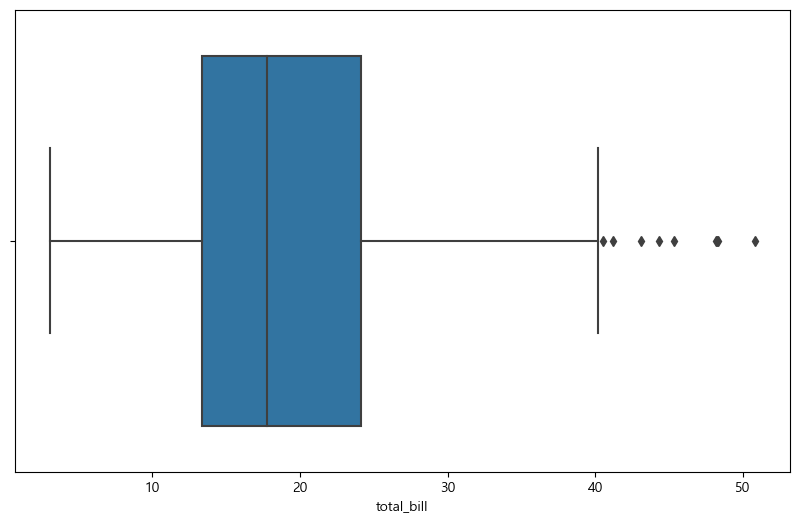

In [33]:
# boxplot

plt.figure(figsize = (10, 6))
sns.boxplot(x = df['total_bill'])
plt.show()

In [34]:
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

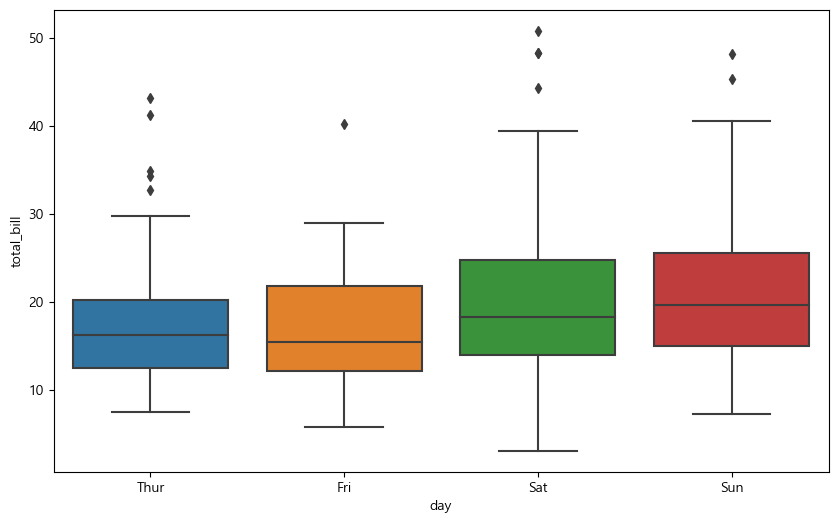

In [35]:
# boxplot

plt.figure(figsize = (10, 6))

sns.boxplot(x = 'day', y = 'total_bill', data = df)
plt.show()

In [36]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


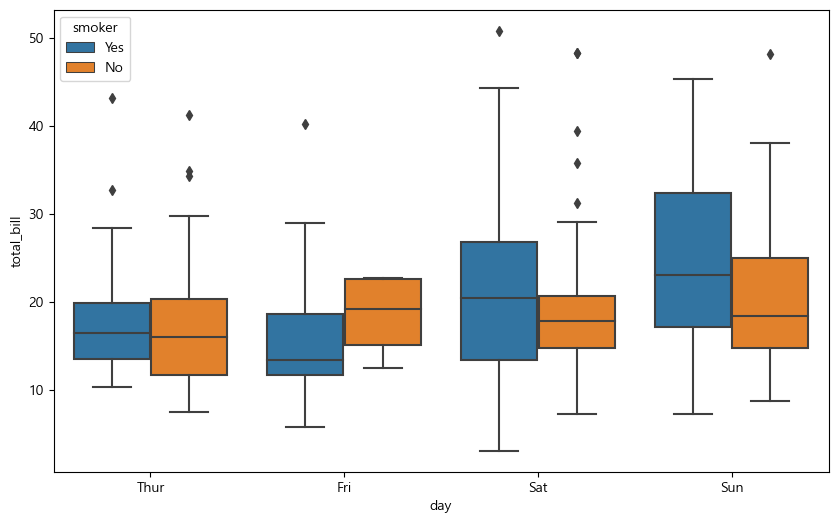

In [37]:
# boxplot, hue(***), palette option
# hue : 카테고리 데이터 표현

plt.figure(figsize = (10, 6))
sns.boxplot(x = 'day', y = 'total_bill', data = df, hue = 'smoker')
plt.show()


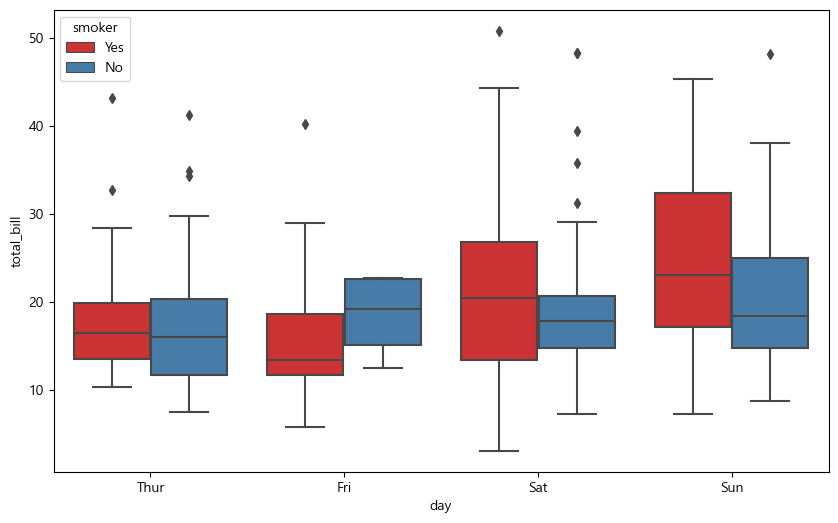

In [38]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'day', y = 'total_bill', data = df, hue = 'smoker', palette = 'Set1')
# Set1 ~ Set3
plt.show()


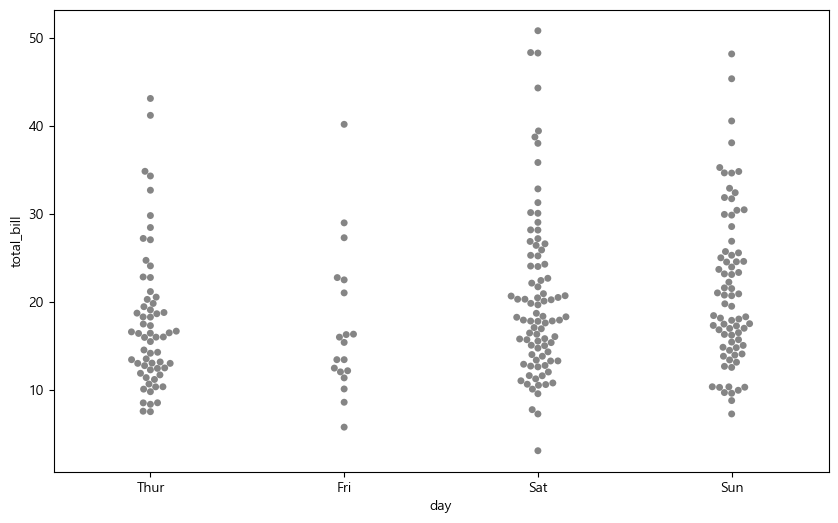

In [39]:
# swarmplot
# color : 0-1 사이 검은색 부터 흰색 사이 값 조절

plt.figure(figsize = (10, 6))
sns.swarmplot(x = 'day', y = 'total_bill', data = df, color = '0.52')

plt.show()

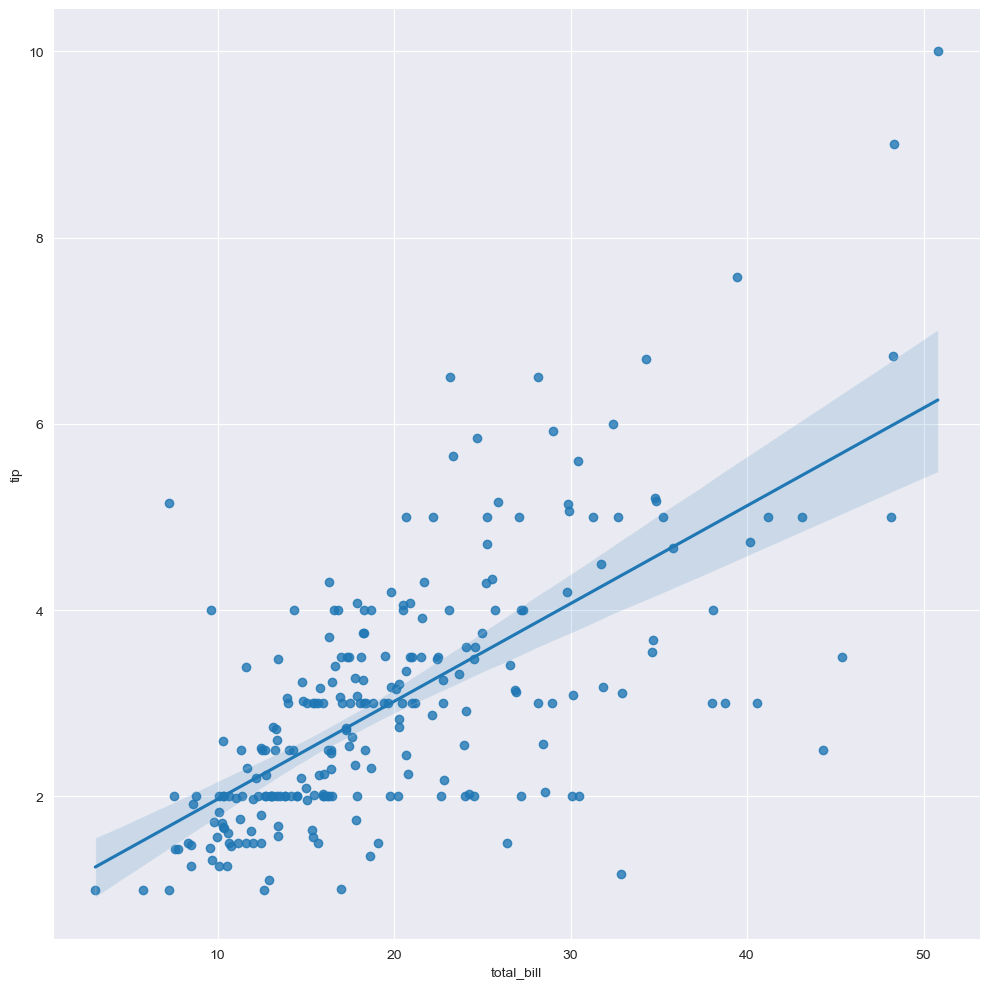

In [40]:
# lmplot (linear model) : total_bill과 tip 하고의 관계 파악

sns.set_style('darkgrid')
sns.lmplot(x = 'total_bill', y = 'tip', data = df, height = 10)
plt.show()

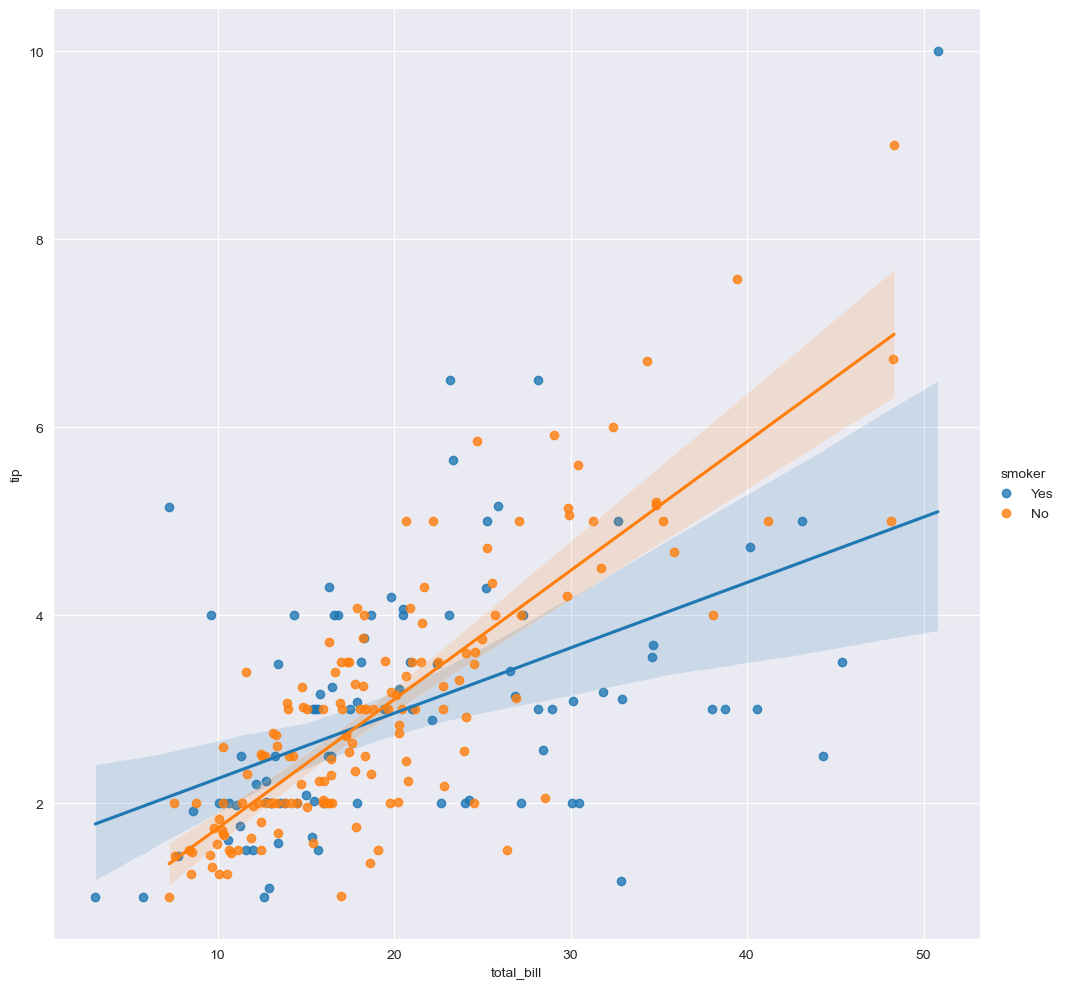

In [41]:
# lmplot (linear model) : total_bill과 tip 하고의 관계 파악

sns.set_style('darkgrid')
sns.lmplot(x = 'total_bill', y = 'tip', data = df, height = 10, hue = 'smoker')
plt.show()

In [42]:
# flight data
# heatmap

df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [43]:
df.pivot(index = 'month', columns = 'year', values = 'passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [44]:
flights = df.pivot(index = 'month', columns = 'year', values = 'passengers')

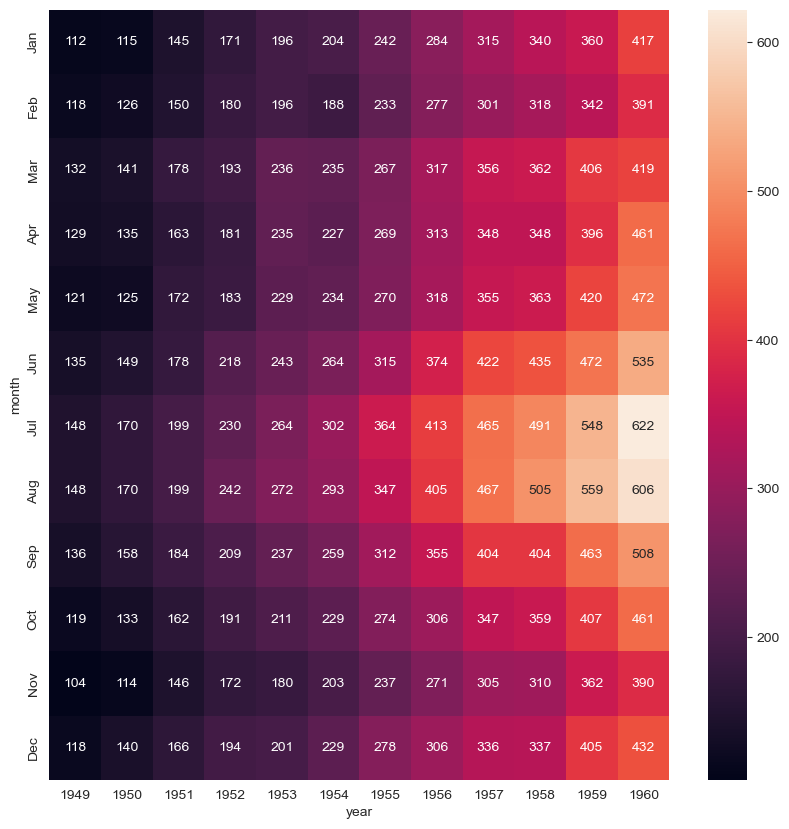

In [45]:
# heatmap 그리기

plt.figure(figsize = (10, 10))
sns.heatmap(data = flights, annot = True, fmt = 'd')
plt.show()

In [46]:
# iris data >> pairplot

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


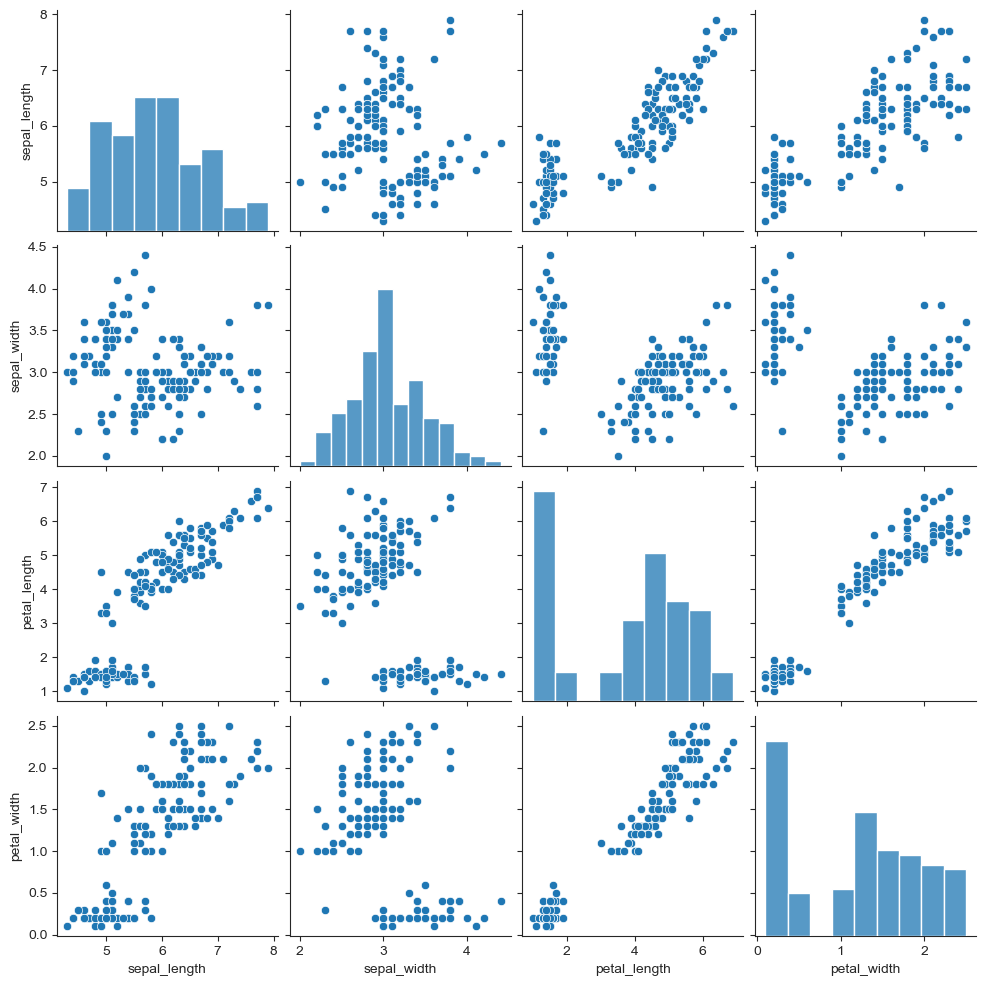

In [47]:
# pairplot

sns.set_style('ticks')

sns.pairplot(iris)
plt.show()

In [48]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [49]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

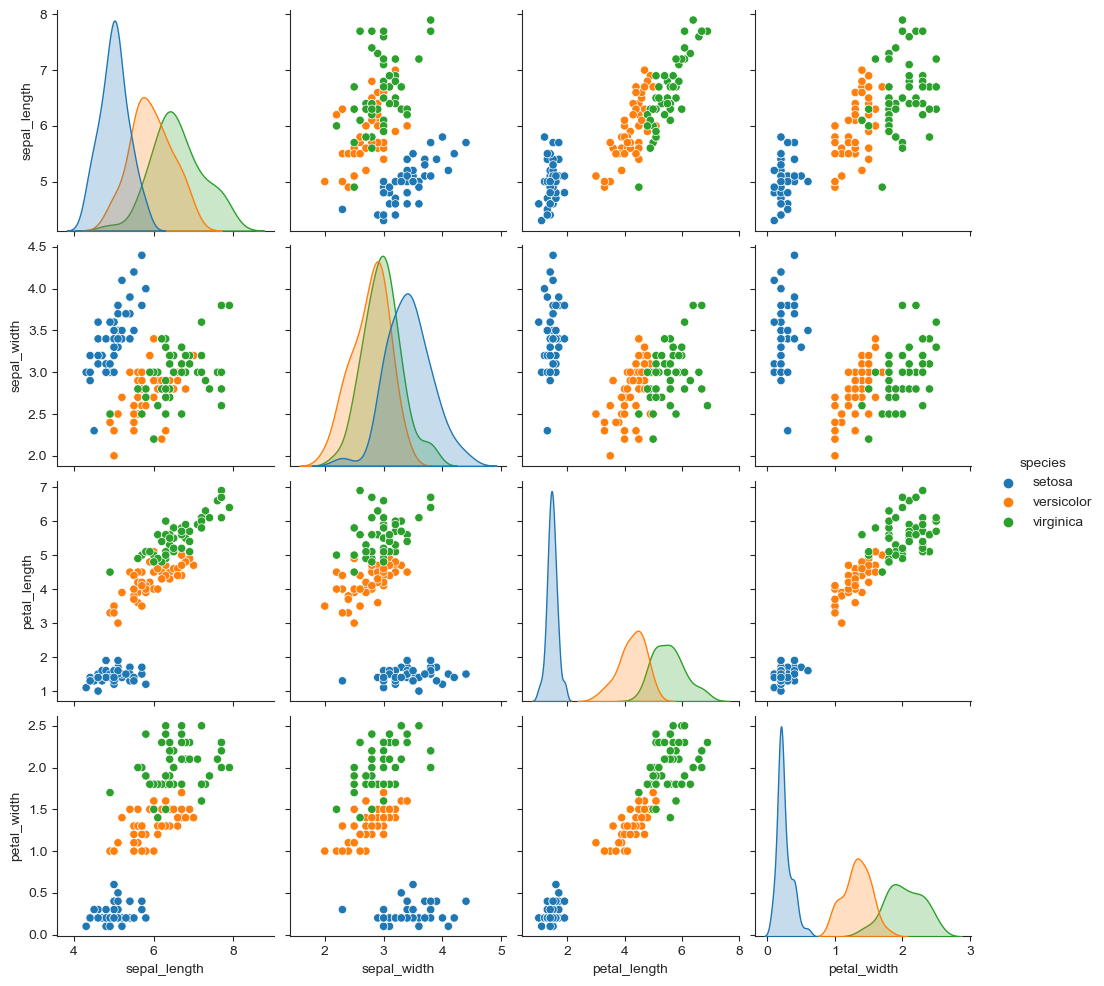

In [50]:
sns.pairplot(iris, hue = 'species')
plt.show()

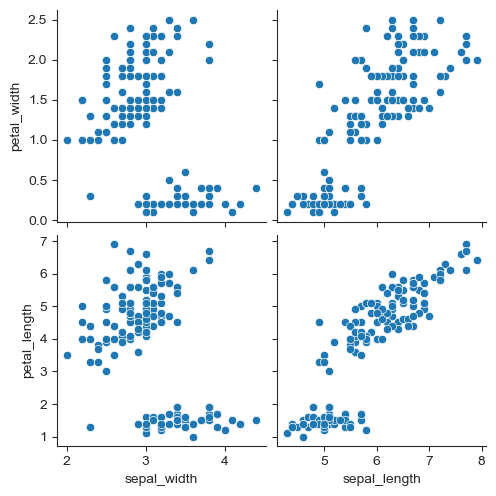

In [51]:
# 원하는 컬럼만 활용, pairplot()

sns.pairplot(iris,
             x_vars = ['sepal_width','sepal_length'],
             y_vars = ['petal_width', 'petal_length'])

plt.show()

In [53]:
df = sns.load_dataset('anscombe')
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [54]:
df.tail()

,dataset,x,y
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89


In [55]:
df['dataset'].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

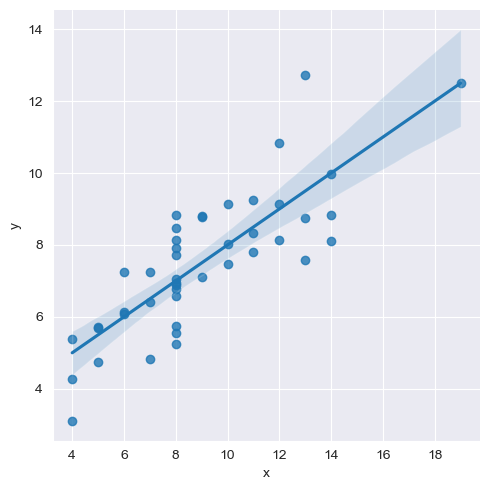

In [56]:
sns.set_style('darkgrid')

sns.lmplot(x = 'x', y = 'y', data = df)
plt.show()

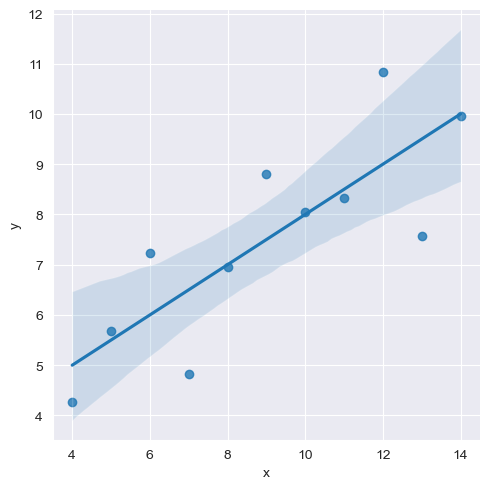

In [57]:
sns.set_style('darkgrid')

sns.lmplot(x = 'x', y = 'y', data = df.query("dataset == 'I'"))
plt.show()

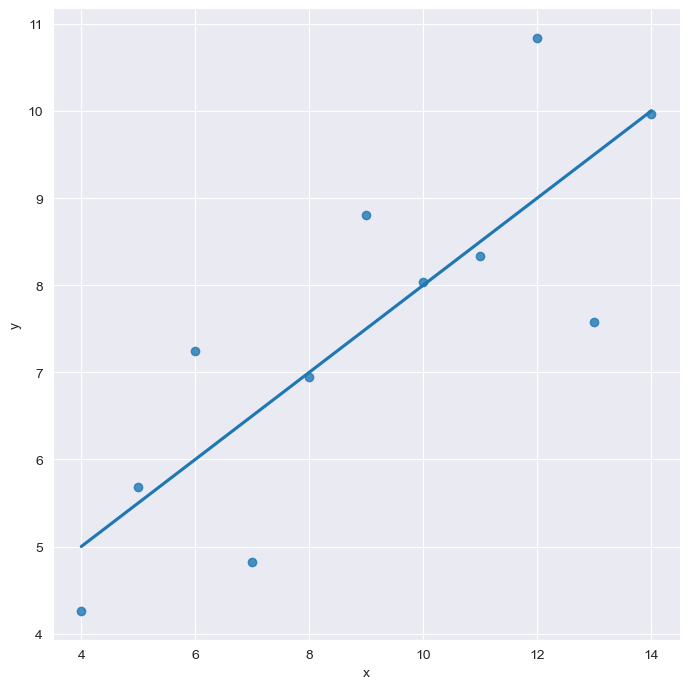

In [58]:
sns.set_style('darkgrid')

sns.lmplot(x = 'x', y = 'y', data = df.query("dataset == 'I'"), ci = None, height = 7)
plt.show()

# ci : 신뢰구간 선택 >> None 신뢰구간 영역 보이는 옵션을 끄는 것, height = size 


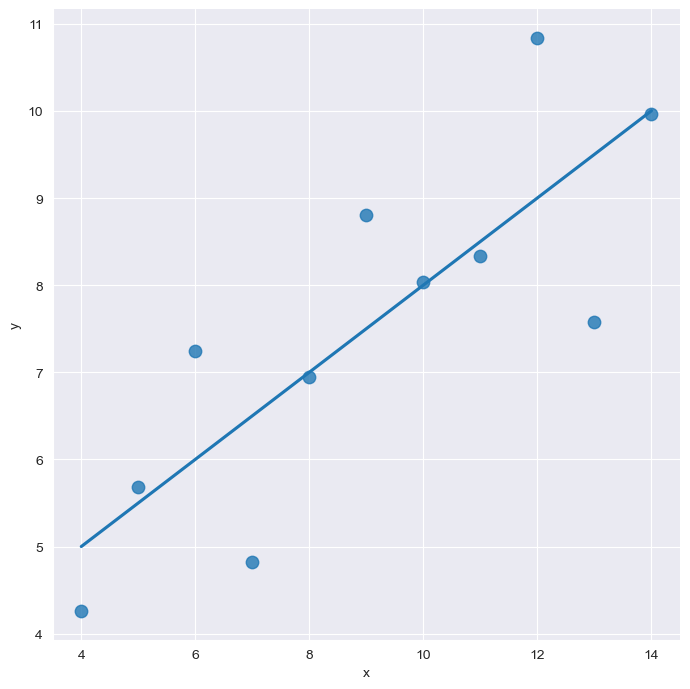

In [59]:
sns.set_style('darkgrid')

sns.lmplot(x = 'x', y = 'y', data = df.query("dataset == 'I'"), ci = None, height = 7, 
           scatter_kws = {'s':80})
plt.show()

# scatter_kws : 마커사이즈

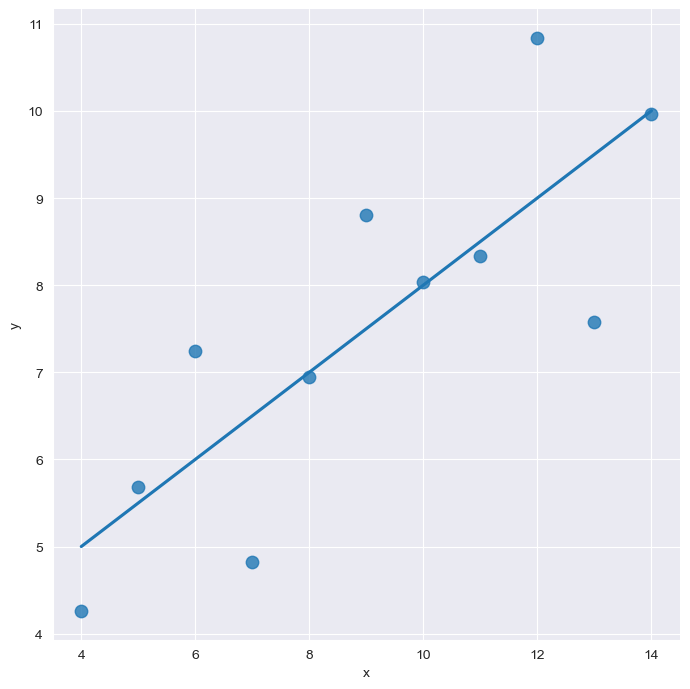

In [60]:
# order option

sns.set_style('darkgrid')

sns.lmplot(x = 'x', y = 'y', data = df.query("dataset == 'I'"), 
           order = 1, # 차수에 따른 옵션 변경 1차원 > 선형
           ci = None, height = 7, 
           scatter_kws = {'s':80})
plt.show()


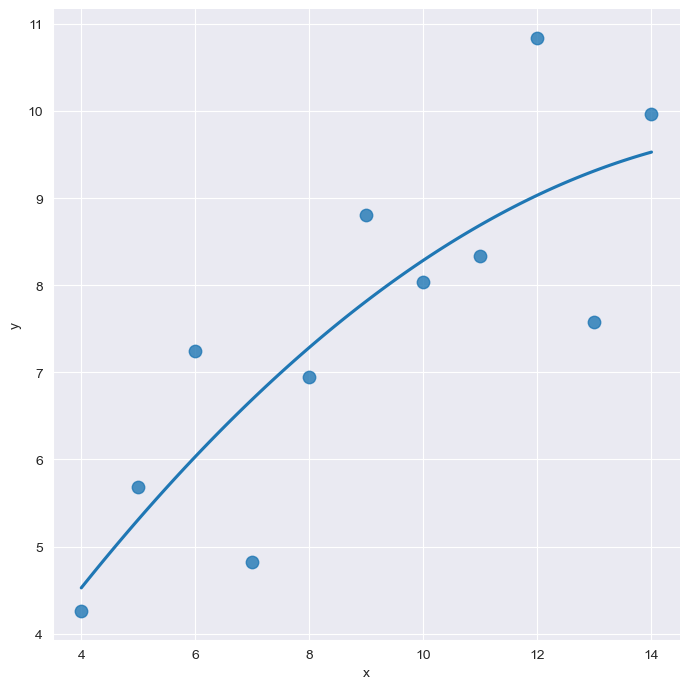

In [61]:
# order option

sns.set_style('darkgrid')

sns.lmplot(x = 'x', y = 'y', data = df.query("dataset == 'I'"), 
           order = 2, # 차수에 따른 옵션 변경 2차원
           ci = None, height = 7, 
           scatter_kws = {'s':80})
plt.show()

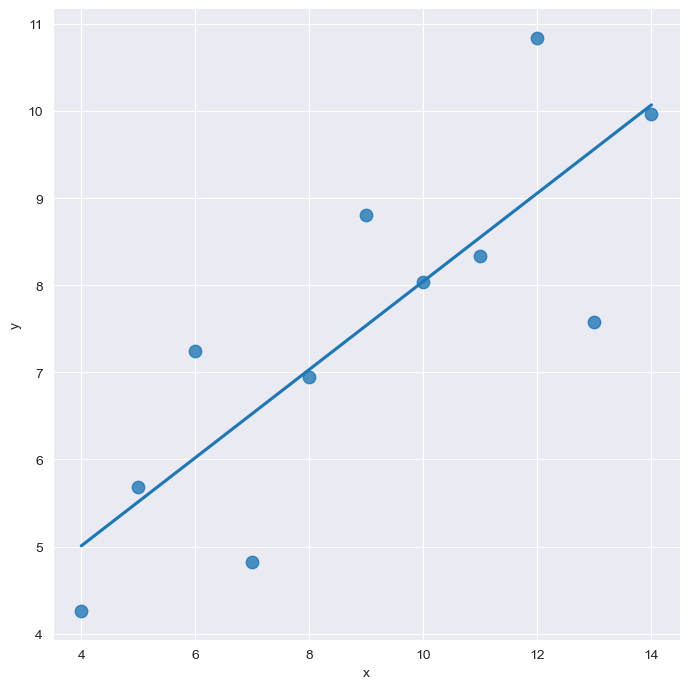

In [63]:
# order option

sns.set_style('darkgrid')

sns.lmplot(x = 'x', y = 'y', data = df.query("dataset == 'I'"), 
           robust = True, # 원본에 많이 떨어진 데이터는 없는 셈 친다.
           ci = None, height = 7, 
           scatter_kws = {'s':80})
plt.show()

folium

In [64]:
# !pip install charset

  Using cached charset-1.0.1.tar.gz (189 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for charset
Failed to build charset
  Running setup.py install for charset: started
  Running setup.py install for charset: finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [24 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-39
      creating build\lib.win-amd64-cpython-39\charset
      copying charset\cmd.py -> build\lib.win-amd64-cpython-39\charset
      copying charset\__init__.py -> build\lib.win-amd64-cpython-39\charset
      running egg_info
      writing charset.egg-info\PKG-INFO
      writing dependency_links to charset.egg-info\dependency_links.txt
      writing entry points to charset.egg-info\entry_points.txt
      writing requirements to charset.egg-info\requires.txt
      writing top-level names to charset.egg-info\top_level.txt
      reading manifest file 'charset.egg-info\SOURCES.txt'
      reading manifest template 'MANIFEST.in'
      writing manifest file 'charset.egg-info\SOURCES.txt'
      running build_ext
      bui

In [65]:
# pip install charset-normalizer

Note: you may need to restart the kernel to use updated packages.


In [67]:
import folium
import json

In [ ]:
# https://www.google.com/maps/place
# /%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C+%EA%B0%95%EB%8F%99%EA%B5%AC+%EA%B0%95%EC%9D%BC%EB%8F%99+510
# /data=!4m13!1m7!3m6!1s0x357cb1aa2ed60525:
# 0x60e94d9e901f94!2z7ISc7Jq47Yq567OE7IucIOqwleuPmeq1rCDqsJXsnbzrj5kgNTEw!3b1!8m2!
# 3d37.5576514!4d127.1737332!3m4!1s0x357cb1aa2ed60525:0x60e94d9e901f94!8m2!3d37.5576514!4d127.1737332

In [68]:
folium.Map(location = [37.5576514, 127.1737332], zoom_start = 16)

In [72]:
sesac_gd = folium.Map(location = [37.5576514, 127.1737332], zoom_start = 16)

In [70]:
sesac_gd.save('sesac_gd.html')

In [79]:
folium.Map(location = [37.5576514, 127.1737332], 
           zoom_start = 14, 
           tiles = 'Stamen Terrain')

In [80]:
# 지도에 마커 생성하기
sesac_gd = folium.Map(location = [37.5576514, 127.1737332], 
                      zoom_start = 14, 
                      tiles = 'Stamen Terrain')

folium.Marker(
    location = [37.5576514, 127.1737332],
    popup = '<b>sesac gangdong campus</b>',
    tooltip = '<i>세싹 강동 캠퍼스</i>'
).add_to(sesac_gd)

sesac_gd